## Adjusted R Squared

**Understading Adjusted R squared**


**Introduction**

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

** Example**

we will use the cement data to illustrate use of the criteria. Therefore, let's quickly review—the researchers measured and recorded the following data (cement.txt) on 13 batches of cement:

1. Response y: heat evolved in calories during hardening of cement on a per gram basis
2. Predictor x1: % of tricalcium aluminate
3. Predictor x2: % of tricalcium silicate
4. Predictor x3: % of tetracalcium alumino ferrite
5. Predictor x4: % of dicalcium silicate

**Visualizations**

Understanding R squared and Adjusted R squared

**Reference**
https://onlinecourses.science.psu.edu/stat501/node/330/

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
df = pd.read_fwf('cement.txt')
df

,y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


Understanding the distribution

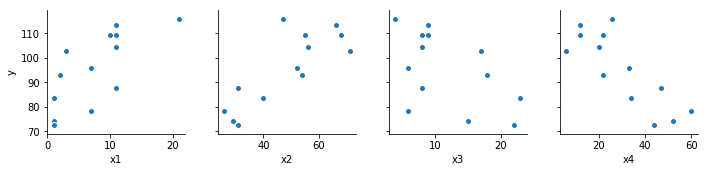

In [3]:
import seaborn as sns
sns.pairplot(data = df, y_vars = ['y'], x_vars = ['x1','x2','x3','x4'])

*Linear Regression*

Y vs X1

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


regresson_X1 = LinearRegression()
# regresson_X1.fit(df.iloc[:,2].values.reshape(-1, 1),df.iloc[:,1])
regresson_X1.fit(df[['x1']], df['y'])
predictions = regresson_X1.predict(df[['x1']])

import statsmodels.formula.api as sm
model1 = sm.ols(formula='y ~ x1', data= df)
fitted1 = model1.fit()
fitted1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     12.60
Date:                Tue, 14 Aug 2018   Prob (F-statistic):            0.00455
Time:                        15:46:18   Log-Likelihood:                -48.206
No. Observations:                  13   AIC:                             100.4
Df Residuals:                      11   BIC:                             101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4793      4.927     16.536      0.000      70.634      92.324
x1             1.8687      0.526      3.550      0.005       0.710       3.027
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                0.874
Skew:                          -0.191   Prob(JB):                        0.646
Kurtosis:                       1.788   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*Linear Regression*

Y vs X1 and X2

In [ ]:
regresson_X1_X2 = LinearRegression()
regresson_X1_X2.fit(df[['x1']+['x2']], df['y'])
predictions = regresson_X1_X2.predict(df[['x1']+['x2']])

import statsmodels.formula.api as sm
model2 = sm.ols(formula='y ~ x1+x2', data= df)
fitted2 = model2.fit()
fitted2.summary()

*Linear Regression*

Y vs X1, X2 and X4

In [224]:
regresson_X1_X2_X4 = LinearRegression()
regresson_X1_X2_X4.fit(df[['x1']+['x2']+['x4']], df['y'])
predictions = regresson_X1_X2_X4.predict(df[['x1']+['x2']+['x4']])

import statsmodels.formula.api as sm
model3 = sm.ols(formula='y ~ x1+x2+x4', data= df)
fitted3 = model3.fit()
fitted3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     166.8
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           3.32e-08
Time:                        11:15:23   Log-Likelihood:                -26.933
No. Observations:                  13   AIC:                             61.87
Df Residuals:                       9   BIC:                             64.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.6483     14.142      5.066      0.001      39.656     103.641
x1             1.4519      0.117     12.410      0.000       1.187       1.717
x2             0.4161      0.186      2.242      0.052      -0.004       0.836
x4            -0.2365      0.173     -1.365      0.205      -0.629       0.155
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.378
Skew:                           0.202   Prob(JB):                        0.828
Kurtosis:                       2.270   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Linear Regression*

Y vs X1, X2, X4 and X3

In [225]:
regresson_X1_X2_X4_X3 = LinearRegression()
regresson_X1_X2_X4_X3.fit(df[['x1']+['x2']+['x4']+['x3']], df['y'])
predictions = regresson_X1_X2_X4_X3.predict(df[['x1']+['x2']+['x4']+['x3']])

import statsmodels.formula.api as sm
model4 = sm.ols(formula='y ~ x1+x2+x4+x3', data= df)
fitted4 = model4.fit()
fitted4.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Thu, 09 Aug 2018   Prob (F-statistic):           4.76e-07
Time:                        11:15:23   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.399     -99.179     223.989
x1             1.5511      0.745      2.083      0.071      -0.166       3.269
x2             0.5102      0.724      0.705      0.501      -1.159       2.179
x4            -0.1441      0.709     -0.203      0.844      -1.779       1.491
x3             0.1019      0.755      0.135      0.896      -1.638       1.842
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.320
Skew:                           0.201   Prob(JB):                        0.852
Kurtosis:                       2.345   Cond. No.                     6.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Models details

In [226]:
d = {'Model': ['Y Vs X1','Y Vs X1,X2','Y Vs X1,X2,X4','Y Vs X1,X2,X4,X3'],
'R Sqr': [fitted1.rsquared, fitted2.rsquared, fitted3.rsquared,fitted4.rsquared],
'R Sqr Adj': [fitted1.rsquared_adj, fitted2.rsquared_adj, fitted3.rsquared_adj, fitted4.rsquared_adj]}

In [227]:
details = pd.DataFrame(d)
details.columns = ['Model', 'R Sqr', 'Adj R Sqr']
details

,Model,R Sqr,Adj R Sqr
0,Y Vs X1,0.533948,0.491580
1,"Y Vs X1,X2",0.978678,0.974414
2,"Y Vs X1,X2,X4",0.982335,0.976447
3,"Y Vs X1,X2,X4,X3",0.982376,0.973563


In [235]:
details.to_csv("Adj R Squre.csv", index = False )

Visualizations

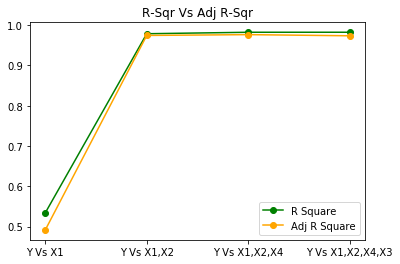

In [228]:
model = details['Model']
rsqr = details['R Sqr']
rsqra = details['Adj R Sqr']
plt.plot(model, rsqr, marker='o', color='g', label='R Square')
plt.plot(model, rsqra, marker='o',color='orange', label='Adj R Square')
plt.legend()
plt.title('R-Sqr Vs Adj R-Sqr')
plt.show()
